In [57]:
# LIBRARIES
import json
from nested_lookup import nested_lookup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict,Counter
from tabulate import tabulate
from itertools import islice
from pivottablejs import pivot_ui
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

with open('PROM_objects.cite') as json_file:  
    database = json.load(json_file)
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
def PlotDistribution(var1):
    l=Counter(var1)
    print(type(l))
    l=list(l.items())
    d = {"object":[item[0] for item in l] , 'number': [item[1] for item in l]};
    pd.set_option('max_colwidth',240)
    df = pd.DataFrame(data=d)
    df.set_index("object",drop=True,inplace=True)
    return df.plot(kind='bar', figsize=(22, 9), fontsize=18)      

In [3]:
n = 5000
n_items = take(n, database.items())
reduceddb=list()
for k in range(len(n_items)):
    reduceddb.append(n_items[k][1])

In [4]:
holder = nested_lookup("holder", reduceddb)
object_type = nested_lookup("object_type", reduceddb)
creator = nested_lookup("creator", reduceddb)
object_lenght= nested_lookup("object_lenght", reduceddb)
object_height= nested_lookup("object_height", reduceddb)
dating=nested_lookup("dating", reduceddb)
kingdom=nested_lookup("kingdom", reduceddb)
period=nested_lookup("period", reduceddb)

In [68]:
#database["10001"]

In [67]:
#PlotDistribution(holder)

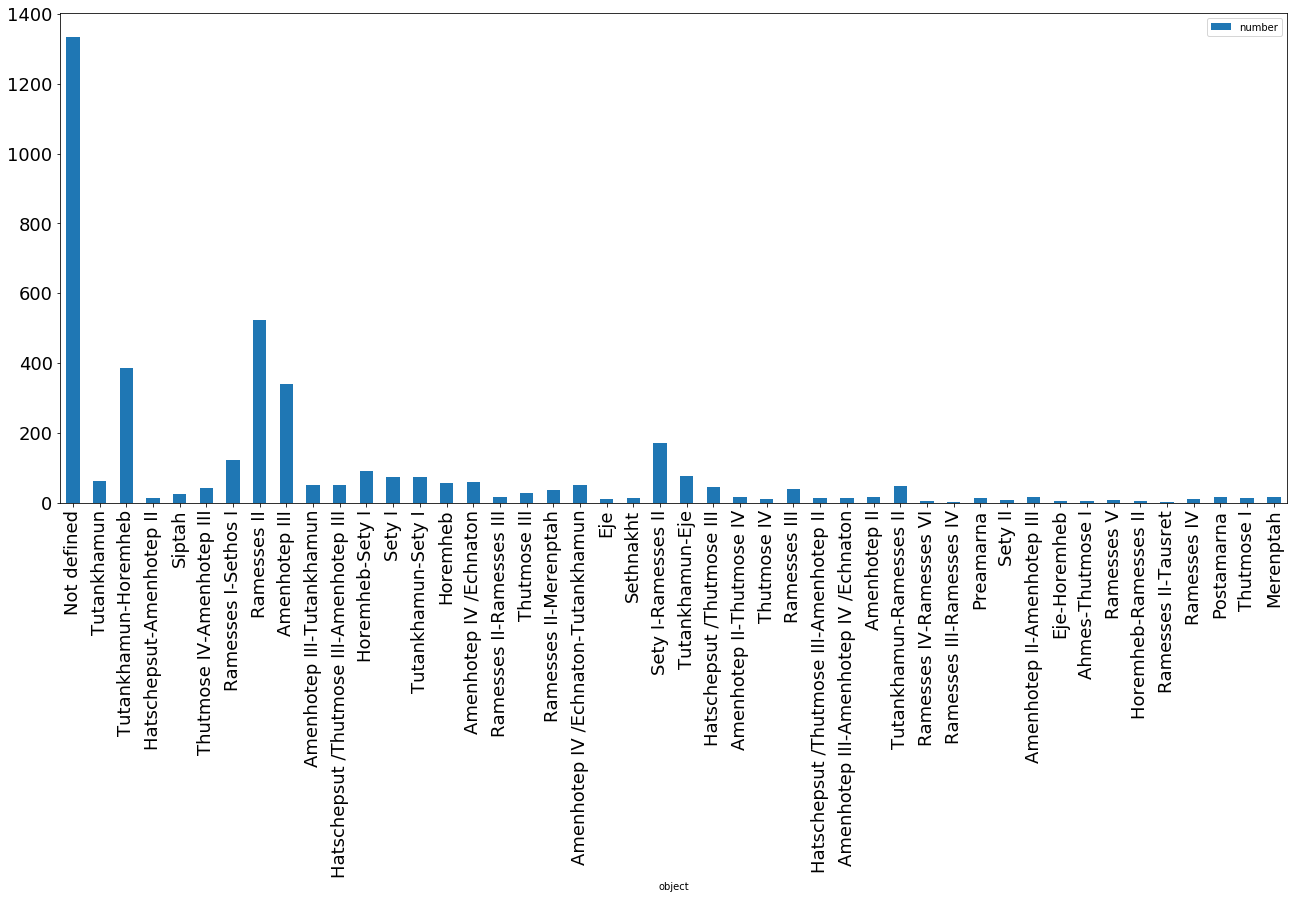

In [7]:
PlotDistribution(kingdom)

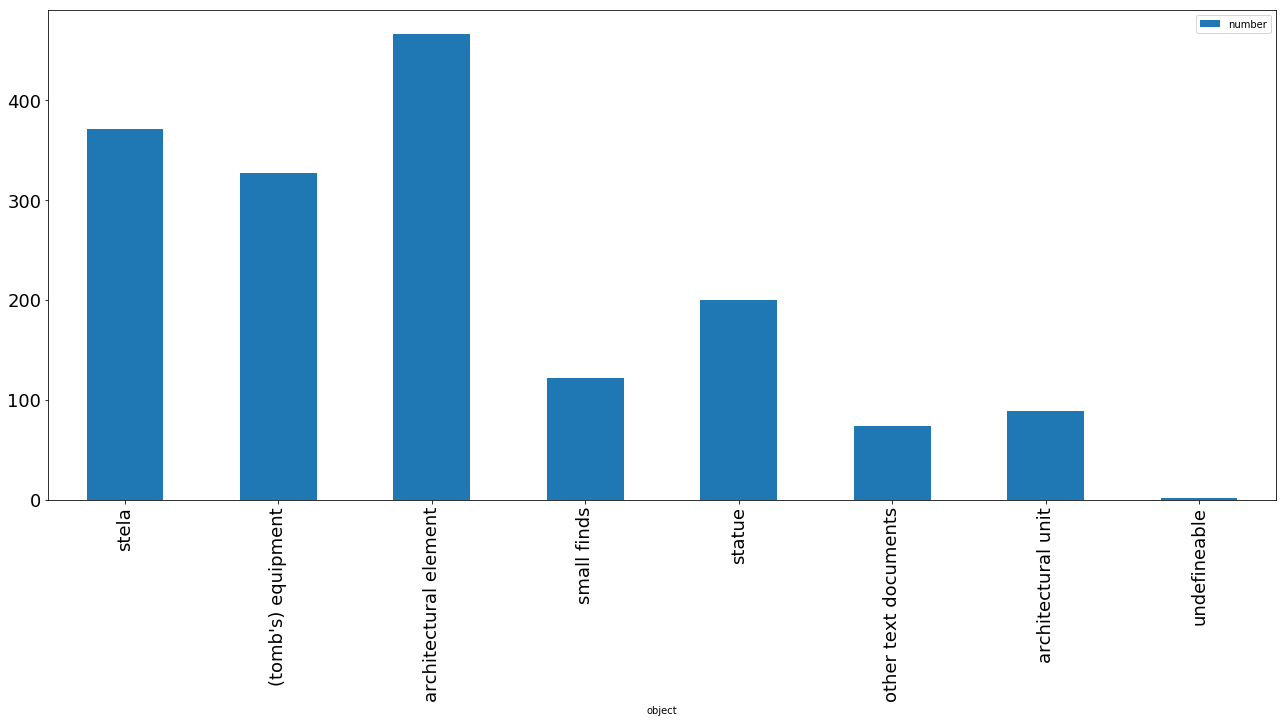

In [8]:
PlotDistribution(object_type)

In [9]:
#d = {'holder': holder, 'dating': dating, 'kingdom': kingdom, 'object type': object_type, 'object lenght': object_lenght, "object height": object_height}
#df = pd.DataFrame(data=d)
#df;

In [10]:
#pivot_ui(df)

In [11]:
reduceddb[1]['related_persons_list']

[{'id': '10003', 'name': 'Jj#', 'gender': 'm', 'translit': 'Ya'},
 {'id': '10004', 'name': 'Jj#', 'gender': 'm', 'translit': 'Ya'},
 {'id': '10450', 'name': 'N.jj', 'gender': 'm', 'translit': 'Ny'},
 {'id': '12594', 'name': 'v#-r.jj', 'gender': 'f', 'translit': 'Tary'},
 {'id': '12595', 'name': 'v#-wob.t', 'gender': 'f', 'translit': 'Tawabet'}]

In [12]:
reduceddb[2]['related_persons_list']

[{'id': '10007', 'name': 'Jj#', 'gender': 'm', 'translit': 'Ya'},
 {'id': '11606', 'name': '?', 'gender': 'm', 'translit': '?'}]

In [13]:
king=list(set(kingdom))
peri=sorted(list(set(period)))

In [14]:
finallist=list()
#for j in range(len(king)):
for j in range(len(peri)):
    temp=list()
    for k in range(len(reduceddb)):
        try:
            #if reduceddb[k]['kingdom'] == king[j]:
            if reduceddb[k]['period'] == peri[j]:
                temp.append(reduceddb[k]['related_persons_list'])
        except:
            pass
    gend=nested_lookup("gender",temp)
    trans=nested_lookup("translit",temp)
    #finallist.append((king[j], Counter(gend)['m'], Counter(gend)['f'], Counter(trans)))
    finallist.append((peri[j], Counter(gend)['m'], Counter(gend)['f'], Counter(trans)))

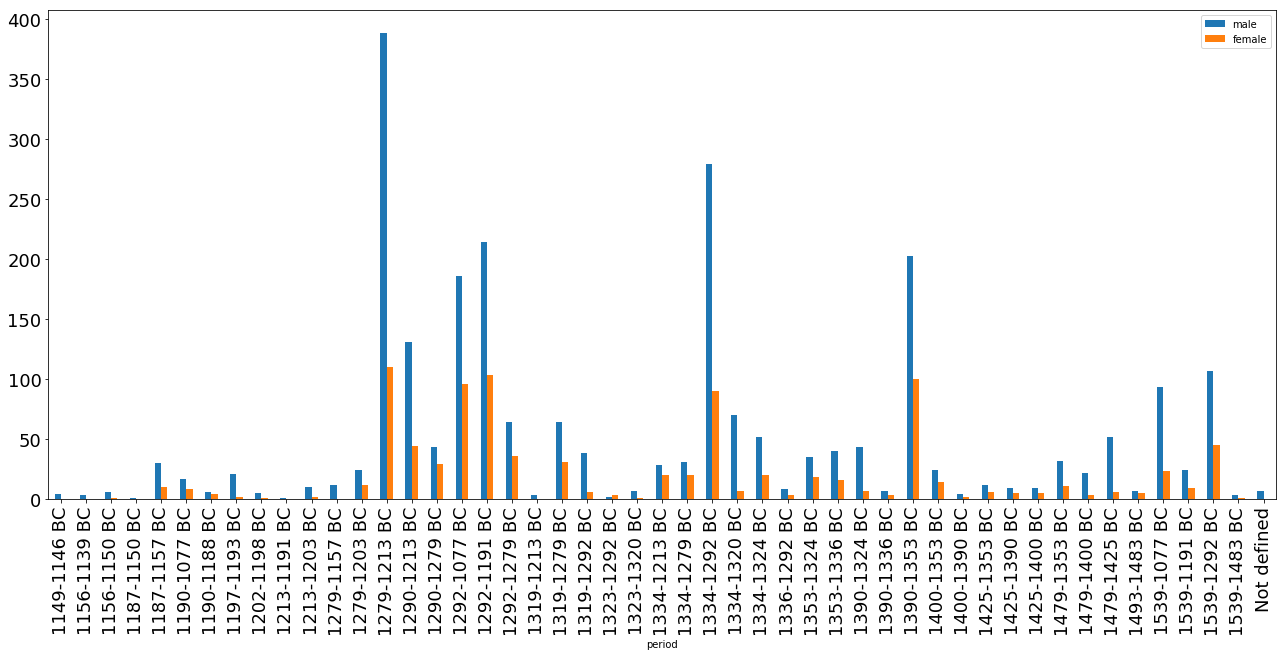

In [15]:
df=pd.DataFrame(finallist)
df = df.rename( columns={0: "period", 1: "male",2: "female", 3: "translit"}) 
df.set_index("period",drop=True,inplace=True)
df.plot(kind='bar', figsize=(22, 9), fontsize=18)

In [59]:
finallist=list()
overalltitlecount=list()
for j in range(len(peri)):
    temp=list()
    title=list()
    for k in range(len(reduceddb)):
        try:
            if reduceddb[k]['period'] == peri[j]:
                temp.append(reduceddb[k]['related_persons_list'])
        except:
            pass
    gend=nested_lookup("gender",temp)
    trans=nested_lookup("translit",temp)
    ids=nested_lookup("id",temp)
    for element in ids:
        try:
            title.append(database[element]['related_titles_list'][0]['translation'])
        except:
            pass
    titlecount=Counter(title)
    overalltitlecount.append(title)
    df1 = pd.DataFrame(list(titlecount.items()))
    df1 = df1.rename( columns={0: "title", 1: "#"}) 
    finallist.append((peri[j], titlecount ))

In [17]:
flat_list = [item for sublist in overalltitlecount for item in sublist]

In [60]:
df = pd.DataFrame(finallist)
df = df.rename( columns={0: "period", 1: "title"}) 
df

,period,title
0,1149-1146 BC,{'overseer of the storehouse': 2}
1,1156-1139 BC,{'vizier': 3}
2,1156-1150 BC,"{'royal butler': 4, 'royal butler of the lord of two lands': 1, 'chantress of Amun': 1}"
3,1187-1150 BC,"{'royal butler, pure of hands': 1}"
4,1187-1157 BC,"{'scribe': 1, 'general': 1, 'quarryman': 1, 'chantress of Thot': 1, 'great deputy of craftsmen of the Per-Khener of the pharao': 3, 'royal scribe': 5, 'chief servant of the royal butler Hori': 1, 'royal butler': 6, 'wab priest of the te..."
5,1190-1077 BC,"{'great scribe of the inventory of Amun': 1, 'chantress of Amun': 2, '[…] of Memphis': 1, 'royal scribe': 3, 'chantress of Isis': 1, 'chief scribe's assistant of the army': 1, 'charioteer': 1, 'standard bearer': 1, 'scribe of the offeri..."
6,1190-1188 BC,"{'royal scribe': 4, 'overseer of young cattle of Ptah': 1, 'craftsman at the place of truth': 1, 'goldsmith': 1}"
7,1197-1193 BC,"{'privy to the secret(s) of the house of Ptah': 1, 'god's father of Ptah': 1, 'god's father and god's beloved': 14, 'herdsman of the vizier Hori of Memphis': 1, 'stable master': 2, 'scribe': 1}"
8,1202-1198 BC,"{'wab priest of Ptah': 4, 'deputy of the house of Ptah': 1, 'chantress of the mistress of the southern sycomore': 1}"
9,1213-1191 BC,{'master of the offering table of Ptah': 1}


In [20]:
#pd.DataFrame(titlecount)

In [22]:
#from IPython.core.display import display, HTML
#display(HTML("http://repositorytest.ancient-astronomy.org/collection/PROM/"))
#HTML('https://ianlondon.github.io/blog/render_html_in_ipython_notebook/')

In [69]:
def Plot(var1):
   # l=Counter(var1)
    l=list(var1.items())
    d = {"object":[item[0] for item in l] , 'number': [item[1] for item in l]};
    pd.set_option('max_colwidth',240)
    df = pd.DataFrame(data=d)
    df.set_index("object",drop=True,inplace=True)
    return df.plot(kind='bar', figsize=(12, 5), fontsize=12)      

In [70]:
def f(x):
    ind=list(df["period"]).index(x)
    return Plot(df["title"][ind])
interact(f, x=df["period"]);

interactive(children=(Dropdown(description='x', options=('1149-1146 BC', '1156-1139 BC', '1156-1150 BC', '1187…